<a href="https://colab.research.google.com/github/ravigaikwad84/Credit-risk-modelling/blob/main/colab_Quantitative_Finance_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install yfinance

     |████████████████████████████████| 63 kB 964 kB/s 
     |████████████████████████████████| 6.4 MB 10.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [3]:
import yfinance as yf

In [17]:
PG=yf.Ticker('PG')
PG

yfinance.Ticker object <PG>

In [18]:
PG.info

{'52WeekChange': 0.13660681,
 'SandP52WeekChange': 0.11475241,
 'address1': 'One Procter & Gamble Plaza',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 152.83,
 'askSize': 800,
 'averageDailyVolume10Day': 5795020,
 'averageVolume': 8333044,
 'averageVolume10days': 5795020,
 'beta': 0.452755,
 'beta3Year': None,
 'bid': 152.79,
 'bidSize': 800,
 'bookValue': 18.256,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cincinnati',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 153.1,
 'currentRatio': 0.672,
 'dateShortInterest': 1647302400,
 'dayHigh': 154.3401,
 'dayLow': 151.26,
 'debtToEquity': 79.418,
 'dividendRate': 3.48,
 'dividendYield': 0.0224,
 'earningsGrowth': 0.126,
 'earningsQuarterlyGrowth': 0.096,
 'ebitda': 21170999296,
 'ebitdaMargins': 0.27021998,
 'enterpriseToEbitda': 18.752,
 'enterpriseToRevenue': 5.067,
 'enterpriseValue': 397000933376,
 'exDividendDate': 1642636800,


In [20]:
PG=PG.history(start='2019-01-01')
PG

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,83.834588,84.166133,82.821538,84.064827,9843900,0.0,0
2019-01-03,83.751723,85.188412,83.235983,83.475433,9820200,0.0,0
2019-01-04,83.659621,85.179199,83.226777,85.179199,10565700,0.0,0
2019-01-07,84.645048,85.188408,84.175358,84.838448,9012500,0.0,0
2019-01-08,85.372601,85.731773,84.562162,85.151573,9551300,0.0,0
...,...,...,...,...,...,...,...
2022-03-29,155.369995,156.470001,154.020004,155.460007,5643400,0.0,0
2022-03-30,152.500000,154.429993,151.940002,154.389999,5779300,0.0,0
2022-03-31,154.100006,154.339996,152.399994,152.800003,7538600,0.0,0


Simple Rate of **Return**

Rate of return % = [(Current Value – Initial Value) / Initial Value] x 100

In [21]:
PG["Simple_Return"] = (PG['Close']/PG['Close'].shift(1))-1
PG

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Simple_Return
Date,,,,,,,,
2019-01-02,83.834588,84.166133,82.821538,84.064827,9843900,0.0,0,NaN
2019-01-03,83.751723,85.188412,83.235983,83.475433,9820200,0.0,0,-0.007011
2019-01-04,83.659621,85.179199,83.226777,85.179199,10565700,0.0,0,0.020410
2019-01-07,84.645048,85.188408,84.175358,84.838448,9012500,0.0,0,-0.004000
2019-01-08,85.372601,85.731773,84.562162,85.151573,9551300,0.0,0,0.003691
...,...,...,...,...,...,...,...,...
2022-03-29,155.369995,156.470001,154.020004,155.460007,5643400,0.0,0,0.010268
2022-03-30,152.500000,154.429993,151.940002,154.389999,5779300,0.0,0,-0.006883
2022-03-31,154.100006,154.339996,152.399994,152.800003,7538600,0.0,0,-0.010299


In [23]:
PG.drop(columns=['Open',	'High',	'Low','Volume',"Dividends",'Stock Splits'],inplace=True)
PG

,Close,Simple_Return
Date,,
2019-01-02,84.064827,NaN
2019-01-03,83.475433,-0.007011
2019-01-04,85.179199,0.020410
2019-01-07,84.838448,-0.004000
2019-01-08,85.151573,0.003691
...,...,...
2022-03-29,155.460007,0.010268
2022-03-30,154.389999,-0.006883
2022-03-31,152.800003,-0.010299


Graph of simple_return

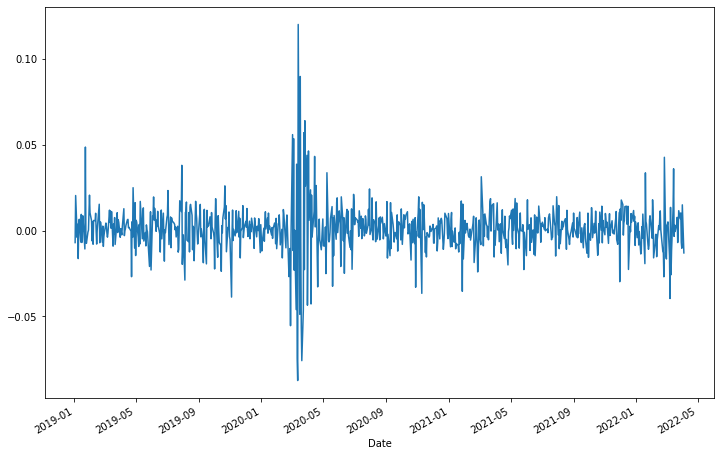

In [25]:
PG['Simple_Return'].plot(figsize=(12,8))
plt.show()

**Average daily return**

In [28]:
avg_returns_d = PG['Simple_Return'].mean()
avg_returns_d

0.000831807000348267

**Average annual returns¶**

In [30]:
##very very less hence investors interested in annual returns

avg_returns_a = PG['Simple_Return'].mean()*250
avg_returns_a

0.20795175008706676

In [41]:
0.20795175008706676*100

20.795175008706675

In [43]:
print (str(round(avg_returns_a,3) *100) + '%')

20.8%


**Log returns**

#log returns are useful for single stock 
#simple returns are useful for multiple stocks

#formula of log returns = ln(p1/p0)= ln p1-ln p0

In [1]:
PG['Log_Returns'] = np.log((PG['Close'])/PG['Close'].shift(1))
PG

NameError: ignored

In [ ]:
PG['Log_Returns'].plot(figsize=(12,8))
plt.show()

In [ ]:
log_returns_d = PG['Log_Returns'].mean()#avg daily log returns
log_returns_d

In [ ]:
log_returns_a = PG["log_returns"].mean()*250#average annual log returns
log_returns_a

In [ ]:
round(log_returns_a,5)*100

In [ ]:
print (str(round(log_returns_a, 3)*100) + '%')\